# Construction of double-sorted risk factor

This codes construct a double-sorted long-short portfolio on Small/Big and Green/Brown stocks. Data includes all stocks from major EU countries from 2017:M1 to 2024:M8. Stocks are identified by the International Securities Identification Number (ISIN).

## Data preparation and factor construction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data = pd.read_csv("../Data/Data_for_3F.csv", index_col=0)

print(data.head())
print(data.shape)

         date          isin   Returns    Mkt. Cap.     EScore
0  2017-01-03  BE0003470755  0.134168  3347.546522  83.541034
1  2017-01-04  BE0003470755 -0.535954  3309.485548  83.541034
2  2017-01-05  BE0003470755 -0.404131  3320.062332  83.541034
3  2017-01-09  BE0003470755 -0.407056  3227.084078  83.541034
4  2017-01-10  BE0003470755 -0.681199  3312.894307  83.541034
(1256445, 5)


## Construct Size factor

At each date $t$ we divide the stocks into five bins for each characteristic (Environmental Score and Size). The double-sorted long-short portfolio is defined as:
$$
\text{SmB} = R_{Small} - R_{Big}
$$

where:
- $R_{Small}$: return of small stocks
- $R_{Big}$: return of big stocks



In [6]:
dates = data['date'].unique()

rS = []
rB = []
for t in dates:
    data_t = data[data['date'] == t].copy()
    data_t.loc[:, 'qSize']  = pd.qcut(data_t['Mkt. Cap.'], q=5, labels=list(range(1, 6)), retbins=True)[0]

    Small = data_t[data_t['qSize']==1]
    wSmall = np.array(Small['Mkt. Cap.'] / Small['Mkt. Cap.'].sum())
    rSmall = np.array(Small['Returns'])

    rS.append(wSmall.T @ rSmall)

    Big = data_t[data_t['qSize']==5]
    wBig = np.array(Big['Mkt. Cap.'] / Big['Mkt. Cap.'].sum())
    rBig = np.array(Big['Returns'])

    rB.append(wBig.T @ rBig)


SizeFactor = pd.DataFrame(index=dates, columns=['Small', 'Big'])

SizeFactor['Small'] = rS
SizeFactor['Big'] = rB
SizeFactor['SmB'] = SizeFactor['Small'] - SizeFactor['Big']

## Construct factor

In [4]:
SizeFactor = pd.DataFrame(index=dates, columns=['Small', 'Big'])

SizeFactor['Small'] = rS
SizeFactor['Big'] = rB
SizeFactor['SmB'] = SizeFactor['Small'] - SizeFactor['Big']

## Plot cumulative returns

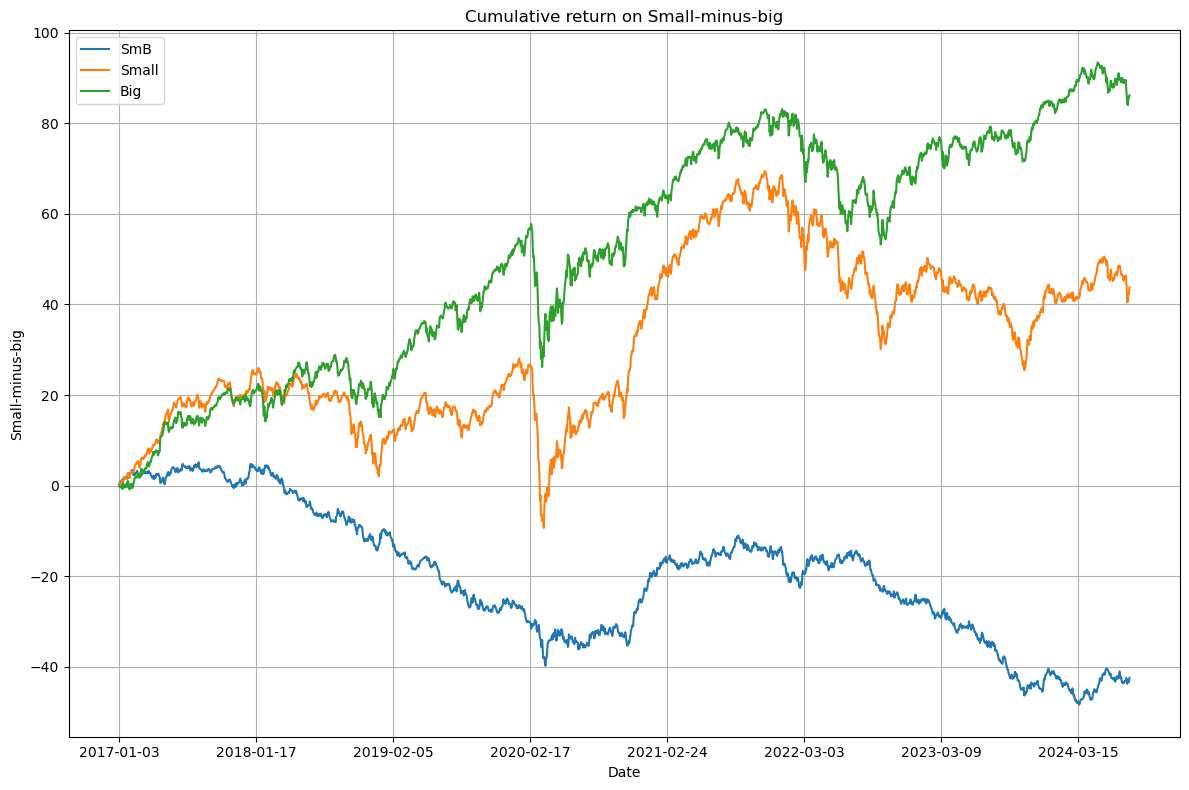

In [5]:

fig = plt.figure(figsize=(12, 8))
plt.plot(SizeFactor['SmB'].cumsum(), label='SmB')
plt.plot(SizeFactor['Small'].cumsum(), label='Small')
plt.plot(SizeFactor['Big'].cumsum(), label='Big')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Small-minus-big")
plt.title("Cumulative return on Small-minus-big")
plt.legend()
plt.tight_layout()

plt.show()
